# Mashup of Glacier Inventories Provides a First Look at the Global Glacier Landscape

## What's this all about
Glaciers are retreating at an alarming rate. Montana’s Glacier National Park had 150 glaciers in 1850; today only 25 remain and they are shrinking. Muir glacier in Alaska has retreated 31 miles since 1892 and is now only a fraction of its former grandeur measuring at only 11 miles long, today.

The world’s glaciers are grouped into 19 regions. Researchers have performed many regional studies of glaciers; however, global studies are scarce. Therefore, I am doing a global assessment of glaciers and glacial retreat to further our knowledge of these important natural resources on a worldwide scale. I'm doing this project in conjunction with the [World Glacier Monitoring Service](https://wgms.ch/) located at the University of Zurich. The WGMS compiles and disseminates standardized data on glacier fluctuations.

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import polygon
import warnings
warnings.filterwarnings("ignore")

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

## What are the 19 glacier regions?
The Global Terretrial Network for Glaciers (GTN-G) has defined 19 glacier regions worldwide. A map of these regions plus a list of their names is shown below.

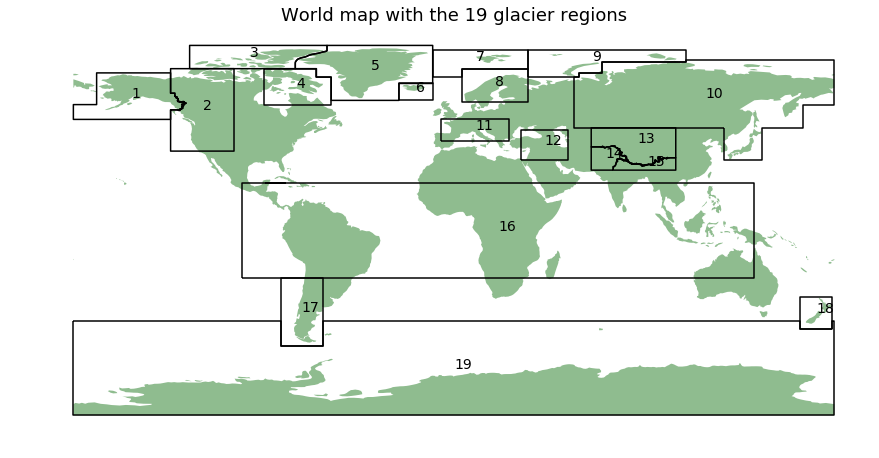

In [2]:
# Open world map
world_bound_fp = 'data/ne_110m_land/ne_110m_land.shp'
world_bound = gpd.read_file(world_bound_fp)

# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

# Plot the the 19 regions each with their own color
fig, ax = plt.subplots(figsize=(15, 10))
world_bound.plot(ax=ax, color="darkseagreen")
glacier_regions.boundary.plot(ax=ax, color="black")
#glacier_regions.plot(ax=ax, cmap='tab20b', alpha=0.7) # plot the regions as transparent boxes with different colors
for x in range(0, 19):
    point = glacier_regions[x:x+1].centroid
    plt.text(point.x[x], point.y[x], str(x+1), fontsize=14)
    
ax.set_title('World map with the 19 glacier regions', fontsize=18)
ax.set_axis_off()

In [3]:
# Display region names
glacier_regions.rename(columns = {'FULL_NAME': 'Region Name', 'RGI_CODE': 'Region Number'}, inplace=True)
print('List of the 19 glacier regions:')
print('')
print(glacier_regions[['Region Number', 'Region Name']].to_string(index=False))

List of the 19 glacier regions:

 Region Number                 Region Name
             1                      Alaska
             2      Western Canada and USA
             3        Arctic Canada, North
             4        Arctic Canada, South
             5         Greenland Periphery
             6                     Iceland
             7      Svalbard and Jan Mayen
             8                 Scandinavia
             9              Russian Arctic
            10                 Asia, North
            11              Central Europe
            12    Caucasus and Middle East
            13               Asia, Central
            14            Asia, South West
            15            Asia, South East
            16               Low Latitudes
            17              Southern Andes
            18                 New Zealand
            19  Antarctic and Subantarctic


## What are the largest glaciers in the world?
The three largest glaciers in the world are the following:
* Vatnajokull Glacier in Region 6 - Iceland (Area 8091.67 km^2)
* Glacier with unknown name in Region 5 - Greenland (Area 7537.75 km^2) (TBD - try and determine the name)
* Seller Glacier in Region 19 - Antarctic and Subantarctic (Area 7018.32 km^2)

Plots of each is shown below (TBD: plot the outlines over a base map of the world).

In [4]:
# Open GLIMS region 6
glims_region_6_fp = "data/glims/processed/cleaned/glims_region_6_cleaned.shp"
glims_polygons_r6 = gpd.read_file(glims_region_6_fp)

# Select largest glacier
r6_largest = glims_polygons_r6[glims_polygons_r6['glac_id']=="G343222E64409N"]
r6_largest.reset_index(inplace=True)

# Open GLIMS region 5
glims_region_5_fp = "data/glims/processed/cleaned/glims_region_5_cleaned.shp"
glims_polygons_r5 = gpd.read_file(glims_region_5_fp)

# Select largest glacier
r5_largest = glims_polygons_r5[glims_polygons_r5['glac_id']=="G344790E81287N"]
r5_largest.reset_index(inplace=True)
r5_largest.replace({'glac_name': 'None'}, 'Unnamed', inplace=True)

# Open GLIMS region 19
glims_region_19_fp = "data/glims/processed/cleaned/glims_region_19_cleaned.shp"
glims_polygons_r19 = gpd.read_file(glims_region_19_fp)

# Select largest glacier
r19_largest = glims_polygons_r19[glims_polygons_r19['glac_id']=="G294015E69537S"]
r19_largest.reset_index(inplace=True)

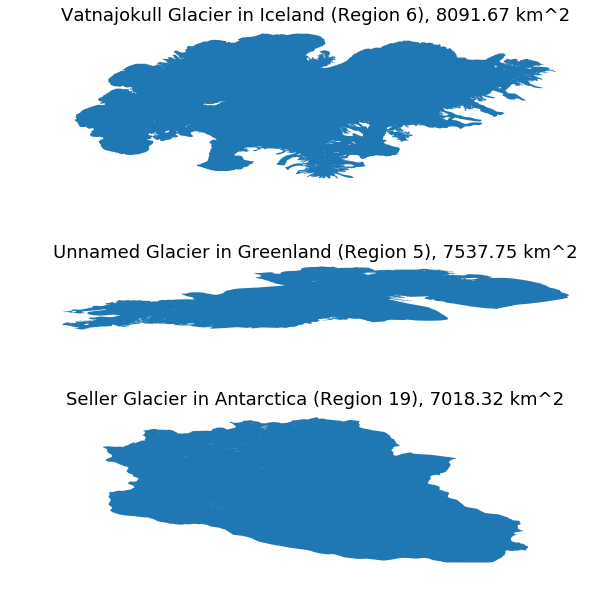

In [5]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r6_largest.plot(ax=ax1)
ax1.set_title(r6_largest['glac_name'][0] + ' Glacier in Iceland (Region 6), '
              + str(r6_largest['db_area'][0]) + ' km^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r5_largest.plot(ax=ax2)
ax2.set_title(r5_largest['glac_name'][0] + ' Glacier in Greenland (Region 5), ' 
              + str(r5_largest['db_area'][0]) + ' km^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r19_largest.plot(ax=ax3)
ax3.set_title(r19_largest['glac_name'][0] + ' in Antarctica (Region 19), ' 
              + str(r19_largest['db_area'][0]) + ' km^2', fontsize=18)
ax3.set_axis_off()

## Why is this important?
It's important to study glaciers because not only are glaciers a beautiful part of our landscape that are disappearing but in many parts of the world glaciers are a source of fresh water and energy through the use of the melt water. As these glaciers retreat, these nations will be out of water or need to find alternative forms of energy. Studying glaciers helps to inform our knowledge of climate change and helps water and energy resource managers plan for the future. 

To determine the three largest glaciers in the world, I combined two databases that contain information on the size and shape of glaciers around the world: [GLIMS (Global Land Ice Measurements from Space)](https://www.glims.org/) and [The Randolph Glacier Inventory (RGI)](https://www.glims.org/RGI/). GLIMS is a project designed to monitor the world's glaciers primarily using data from optical satellite instruments. It provides glacial outlines at multi-temporal resolution for glaciers around the world as shapefiles. RGI is a globally complete inventory of glacier outlines and is intended to be a snapshot of the world’s glaciers as they were near the beginning of the 21st century. 

Using these two datasets, I searched for the largest three in each and compared them. Since GLIMS has the latest information where as RGI data centers around the beginning of the 21st century, GLIIMS appears to have provided the most accurate assessment of the largest glaciers in the world. A validation of the analysis still needs to be performed through a literature search and through communication with the [WGMS National Glacier Correspondents](https://wgms.ch/contact_ncs/).

While knowing the three largest glaciers in the world may not seem like a significant outcome, it helps to start education and outreach conversations with the public to bring awareness to the plight of glaciers. In addition, it is a starting point for an an analysis of a retreat of these glaciers which is important to water and energy resource managers and well as amateur glacier enthusiasts, alike.

## Want to learn more?

If the reader would like to learn more about this analysis and look at the code used to perform it, please see my github repository, [wgms-glacier-project](https://github.com/windnage/wgms-glacier-project).

Note: This analysis is still preliminary and needs to be validated.